In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_df=pd.read_excel('Gas Data processed.xlsx',sheet_name="code_monthly_deflated")
df=data_df.loc[1:141,["months", "price_gas", "price_brent_gbp","open_interest_gas","lng","storage","temperature","euas","supply","coal_gbp","eurgbp","gbpusd", "churn"]] 
print(df)

     months  price_gas  price_brent_gbp  open_interest_gas       lng  \
1    Nov 09  33.794286        53.233565            13795.0  1.270000   
2    Dec 09  38.318182        52.288674            12590.0  1.670000   
3    Jan 10  44.157175        54.302797            13650.0  1.540000   
4    Feb 10  35.532880        55.081704            12720.0  1.330000   
5    Mar 10  33.494927        58.531509            18530.0  1.320000   
..      ...        ...              ...                ...       ...   
137  Mar 21  42.778793        43.494060            44325.0  2.321223   
138  Apr 21  54.713896        42.188306            37515.0  2.111904   
139  May 21  54.765343        43.616761            35298.0  1.428956   
140  Jun 21  77.151842        47.484969            35409.0  1.016736   
141  Jul 21  93.216532        48.574609            31580.0  0.169767   

      storage  temperature     euas     supply   coal_gbp   eurgbp    gbpusd  \
1   -0.060000        10.00  11.1690   8.150000  53.7127

price_gas


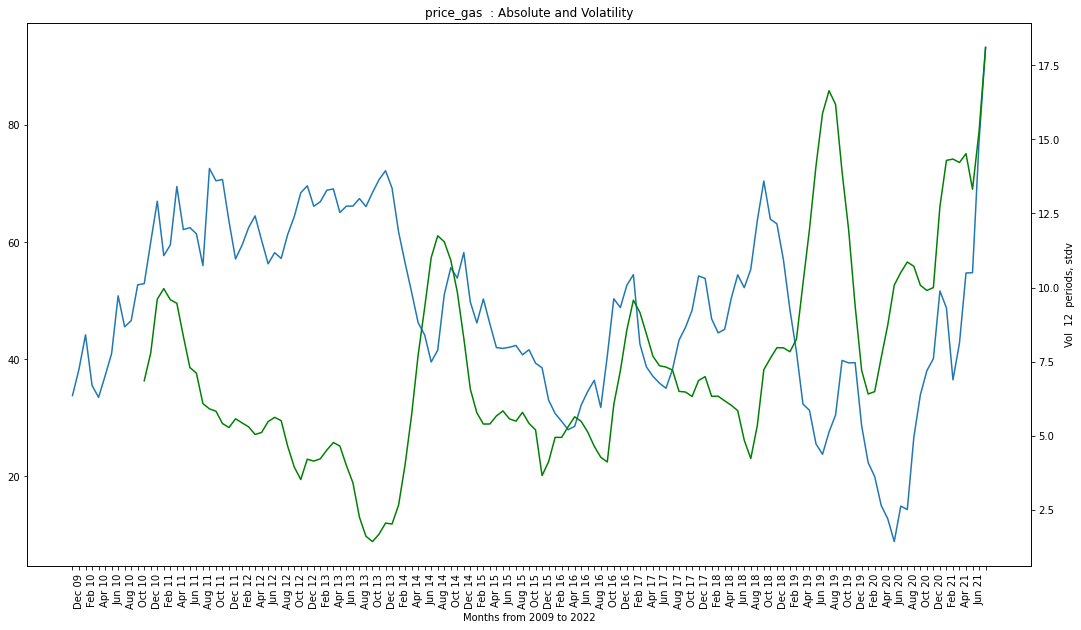

price_brent_gbp


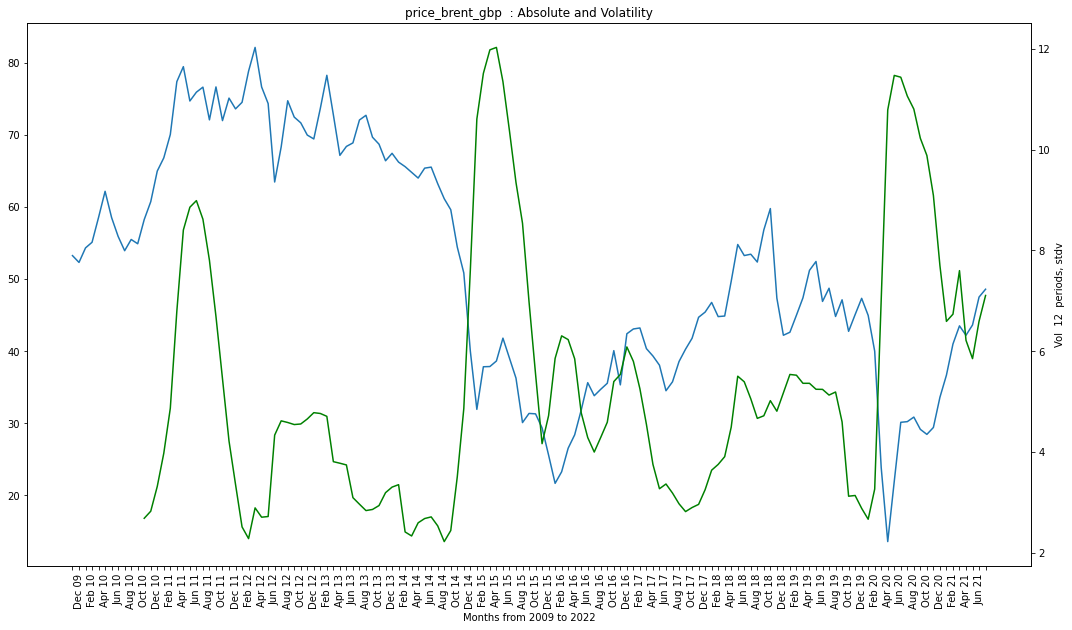

open_interest_gas


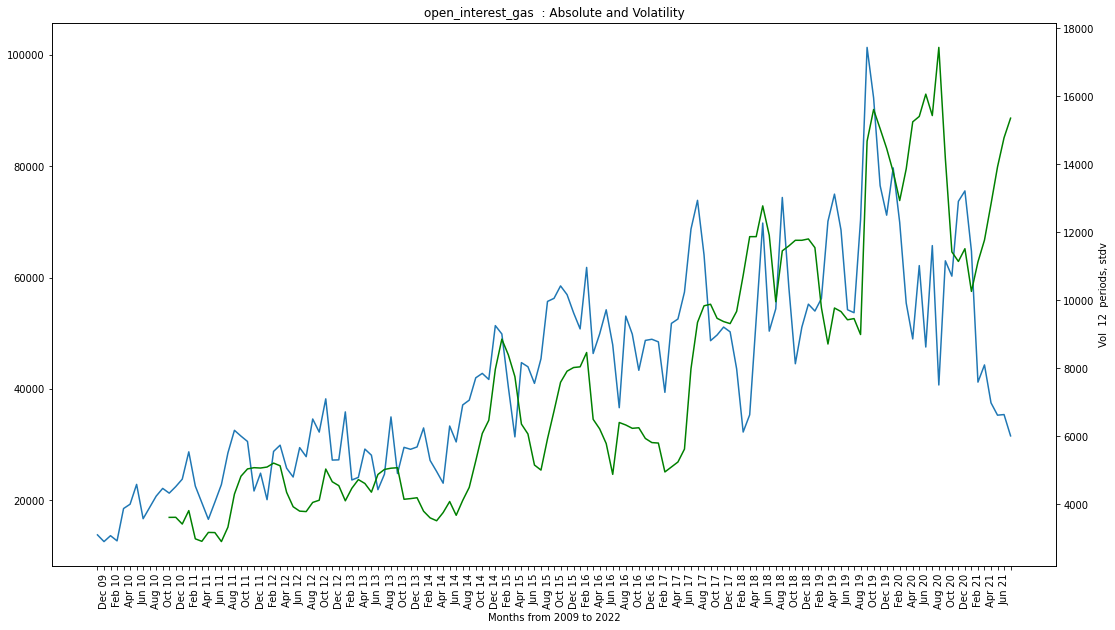

lng


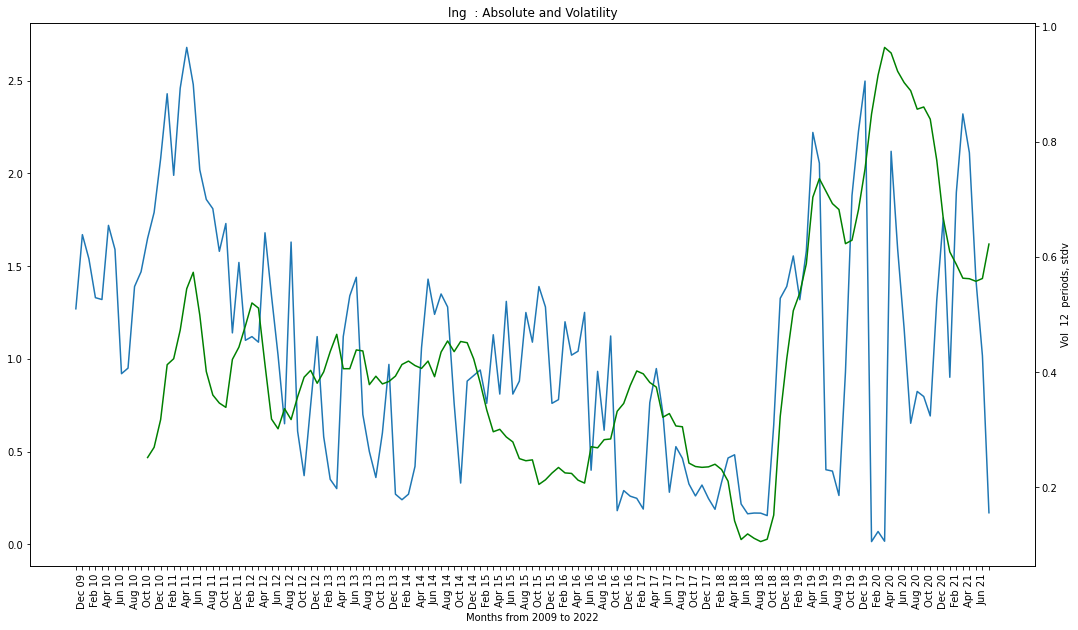

storage


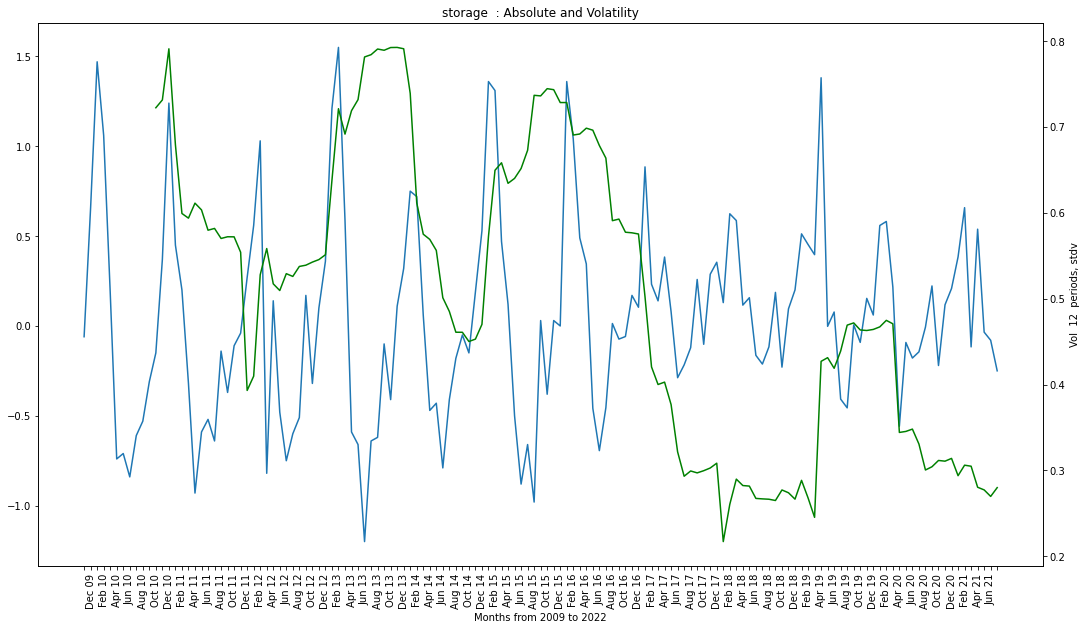

temperature


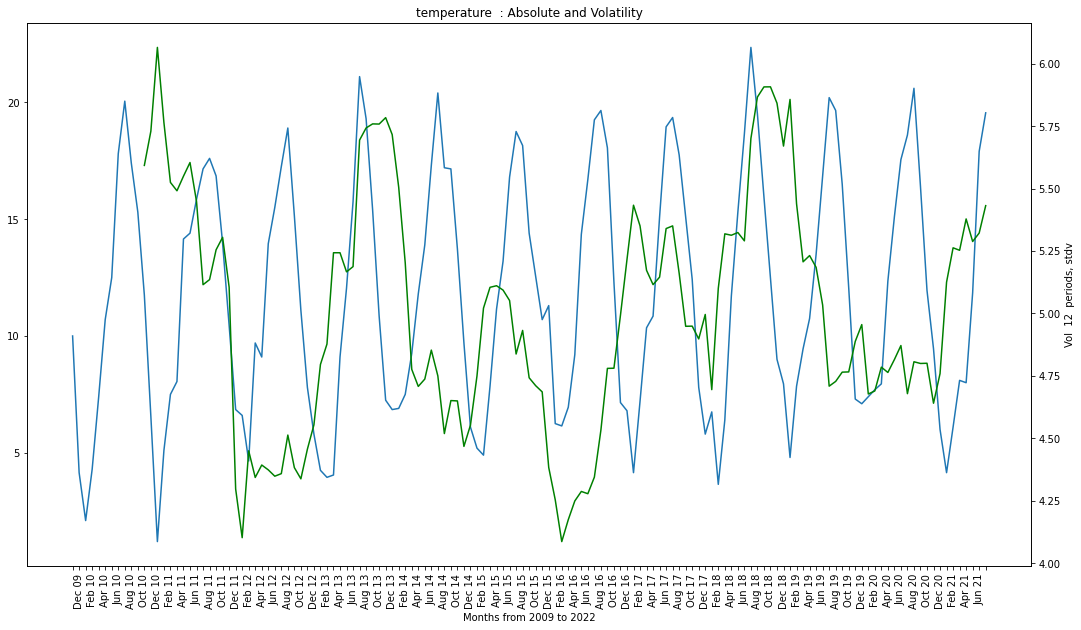

euas


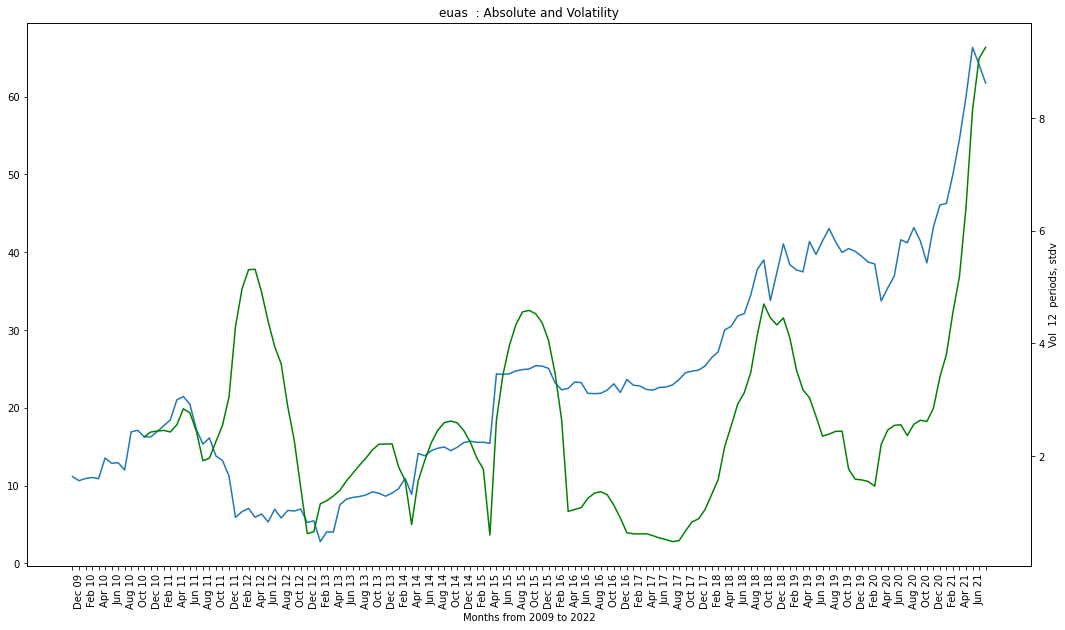

supply


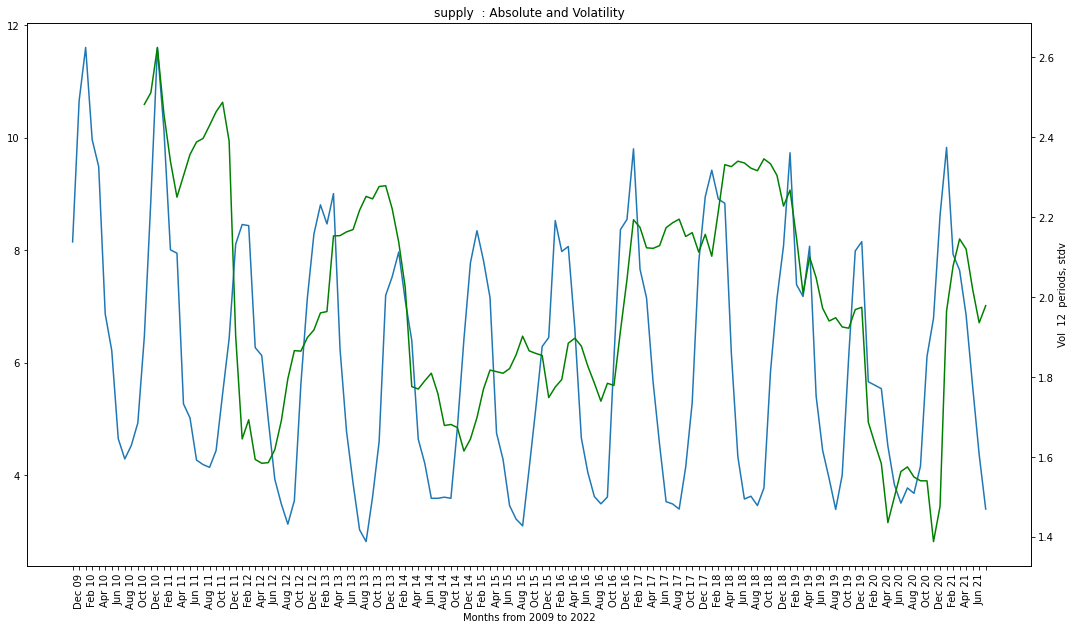

coal_gbp


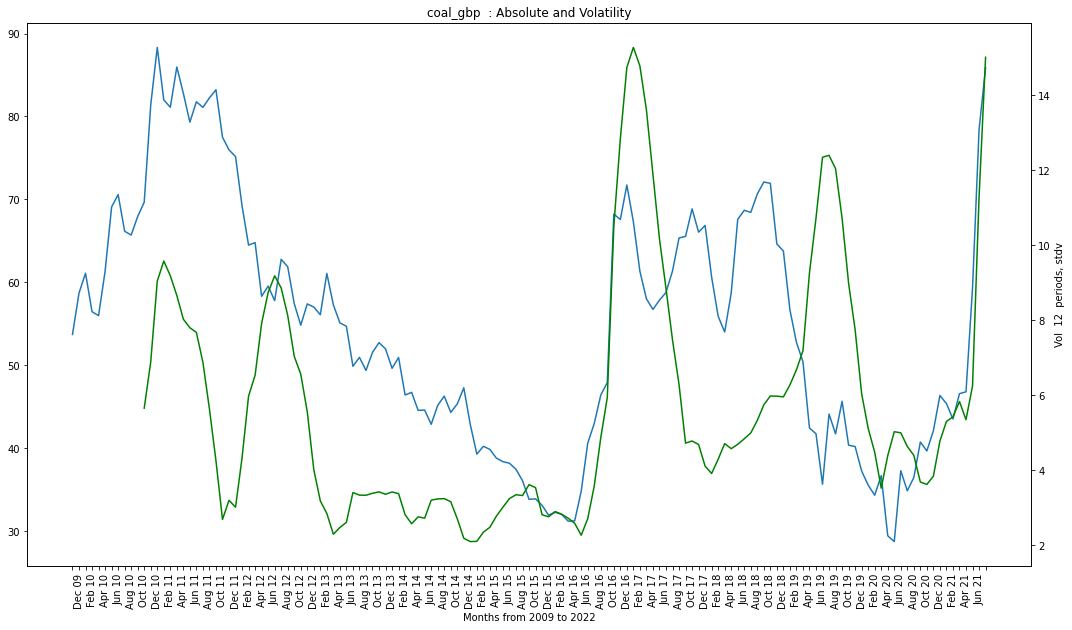

eurgbp


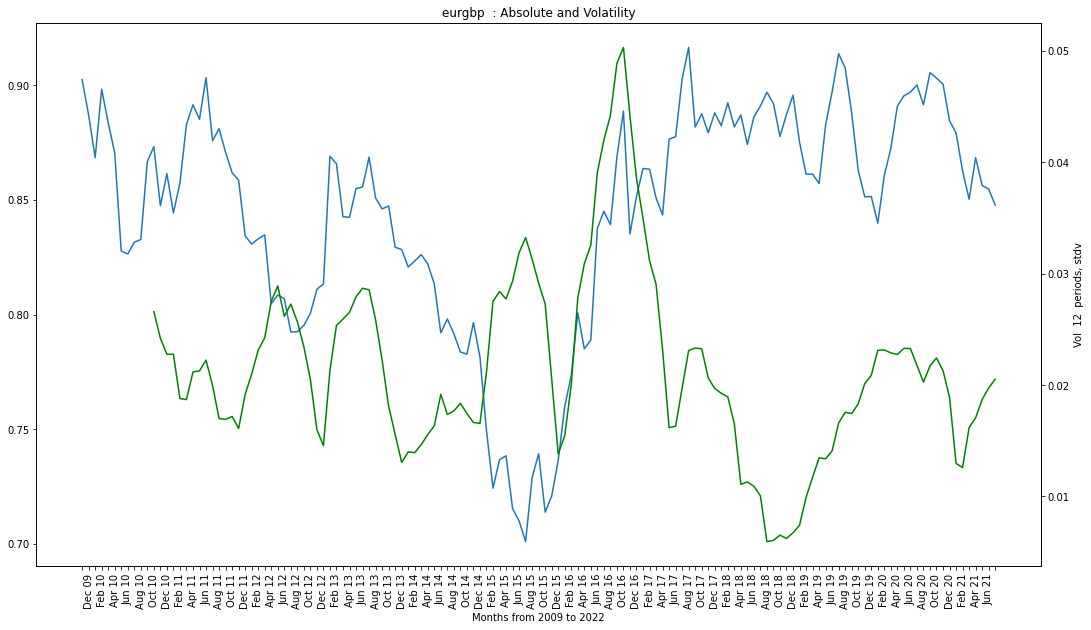

gbpusd


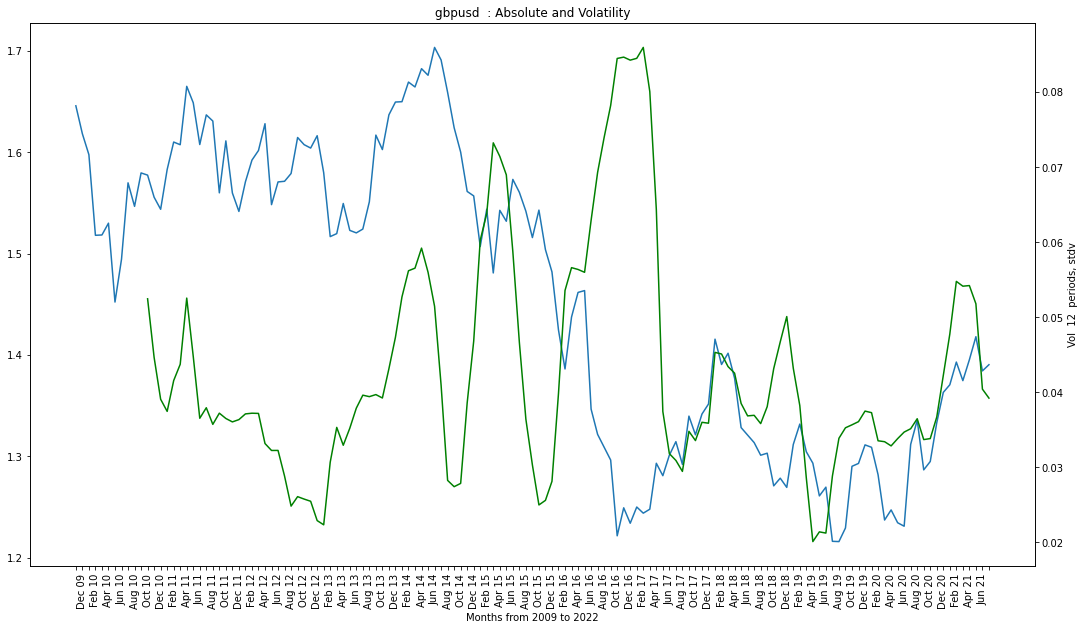

churn


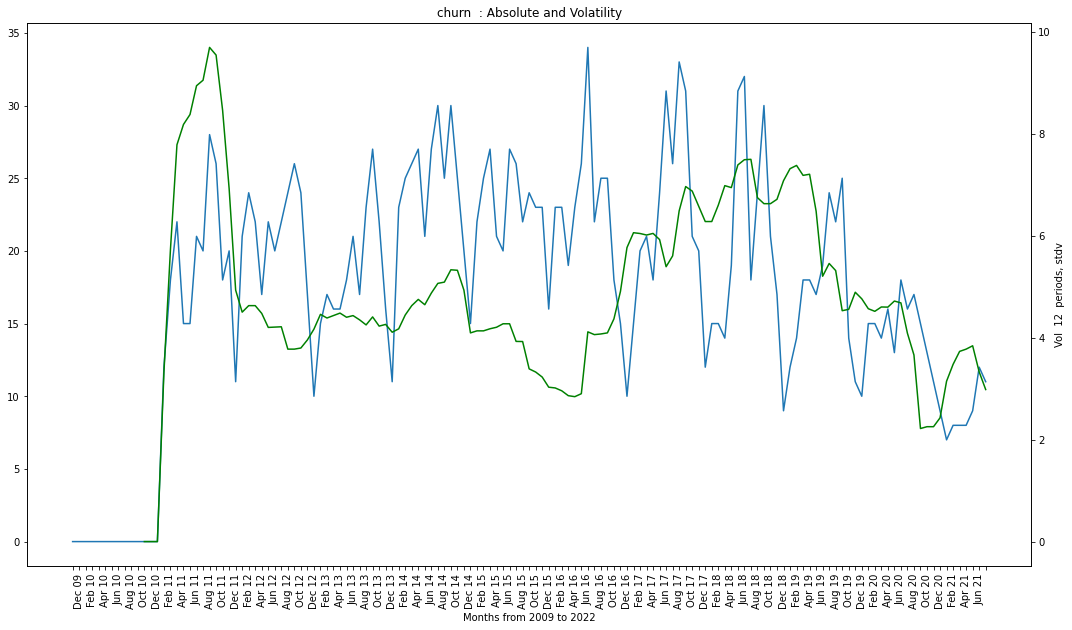

In [7]:
column_names = list(df.columns.values)
year = column_names.pop(0)
for name in column_names:
    print(name)
    col = df[name].values

    price_list=pd.Series(col) 
    var=12  #12 periods
    rollist=price_list.rolling(var) 
    rolvol=rollist.std(ddof=0) 

    plt.figure(figsize=(18, 10))
    plt.plot(df.months,col, label=name)
    plt.xlabel("Months from 2009 to 2022")
    plt.title(name + "  : Absolute and Volatility")
    ax = plt.gca()
    plt.xticks(rotation=90)
    for label in ax.get_xaxis().get_ticklabels()[::2]:
        label.set_visible(False)


    plt2=plt.twinx()
    plt2.plot(rolvol, color="green")
    plt2.set_ylabel("Vol  " + str(var) + "  periods, stdv", color="black")    
    plt.show() 

price_gas price_brent_gbp


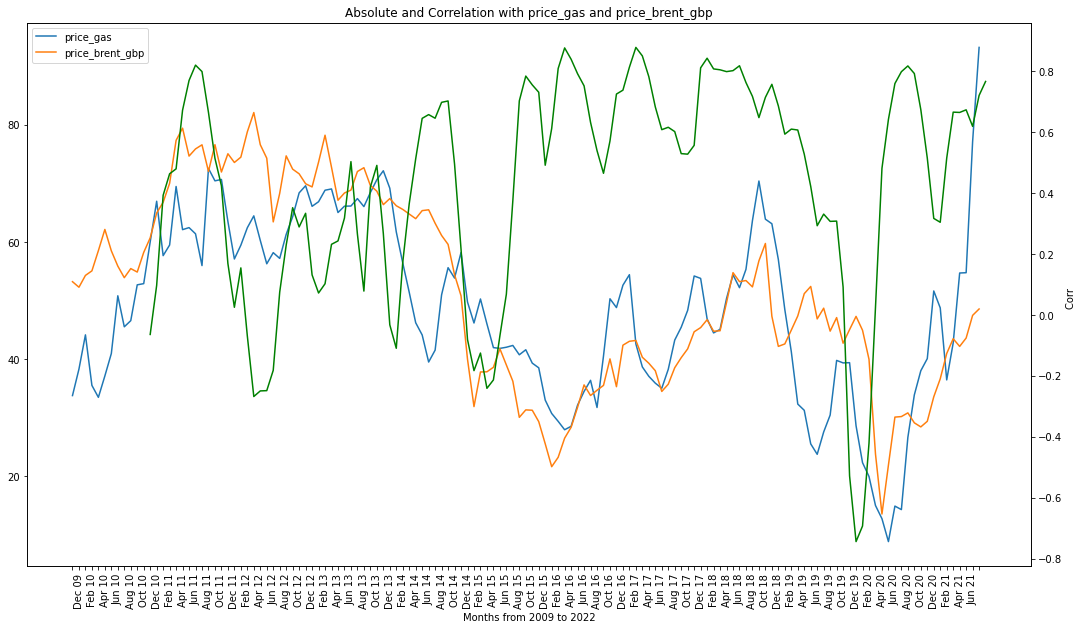

price_gas open_interest_gas


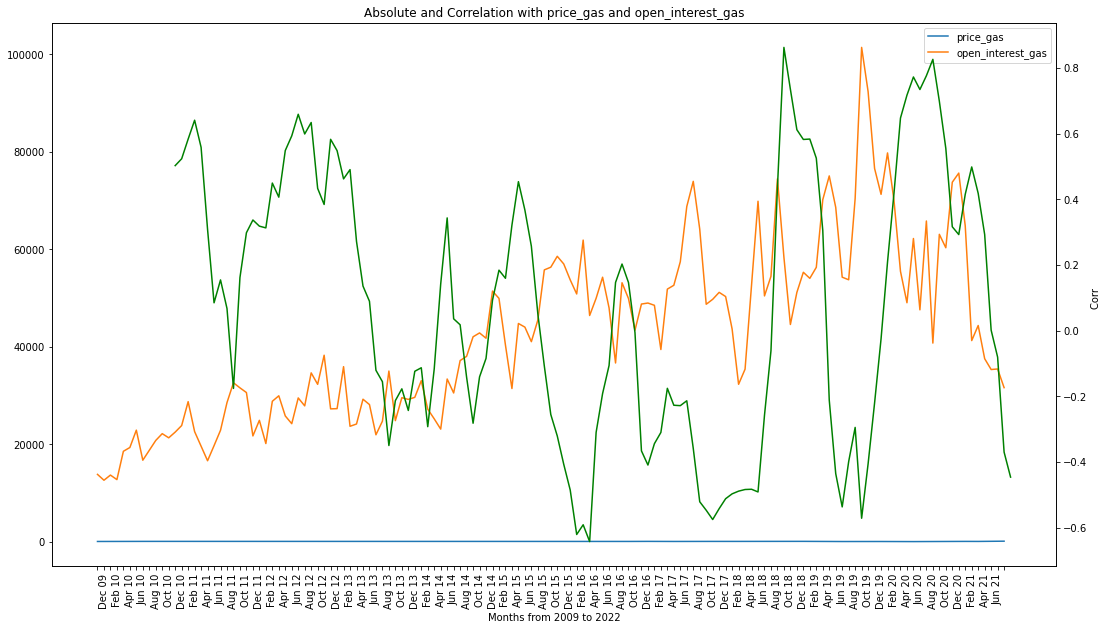

price_gas lng


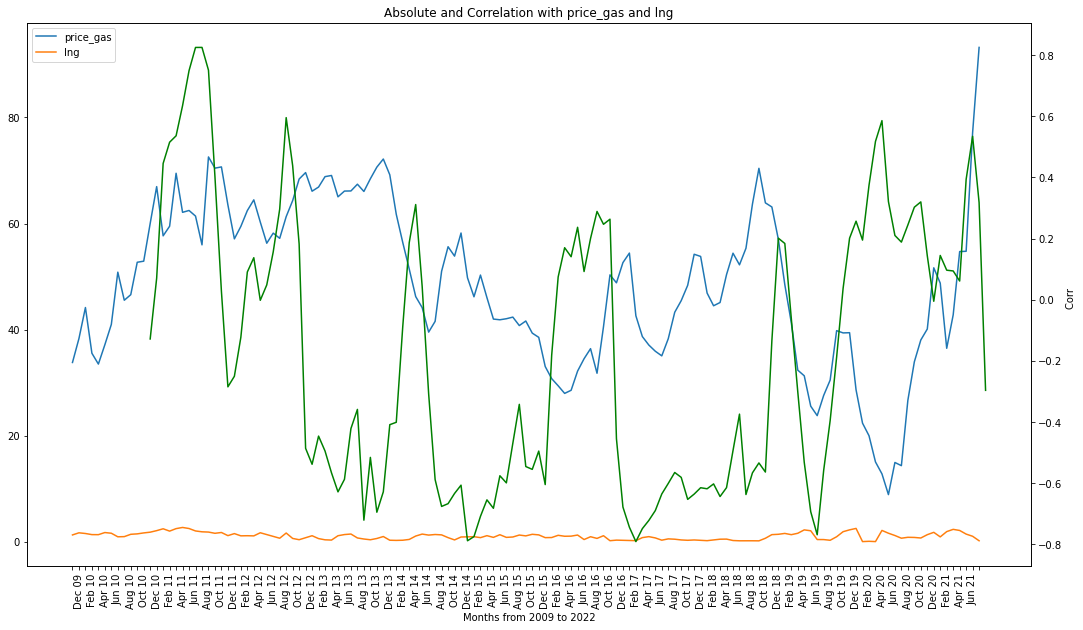

price_gas storage


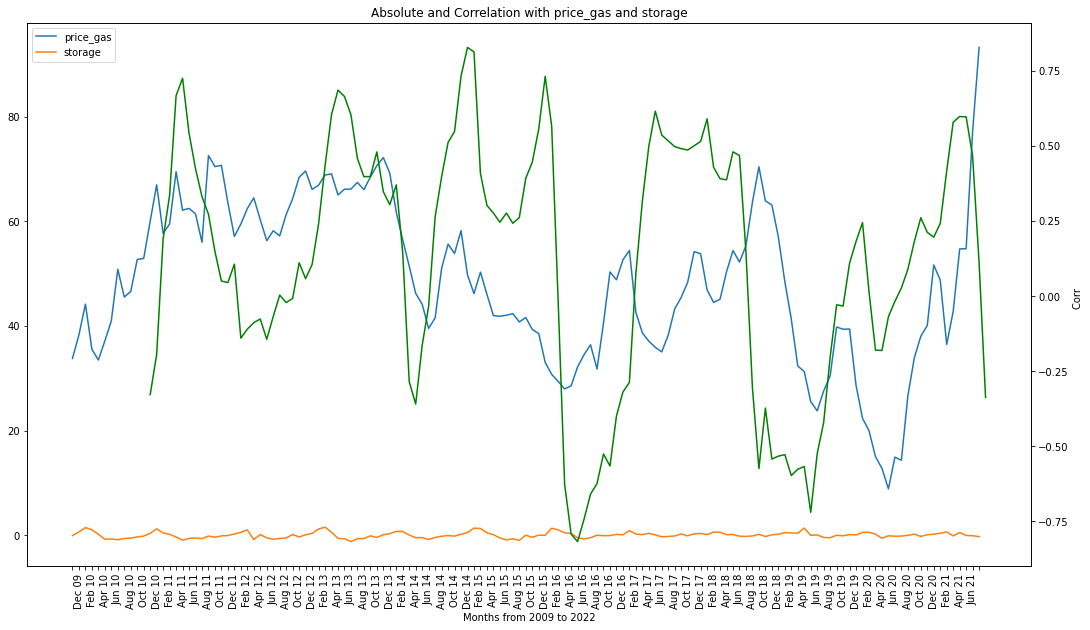

price_gas temperature


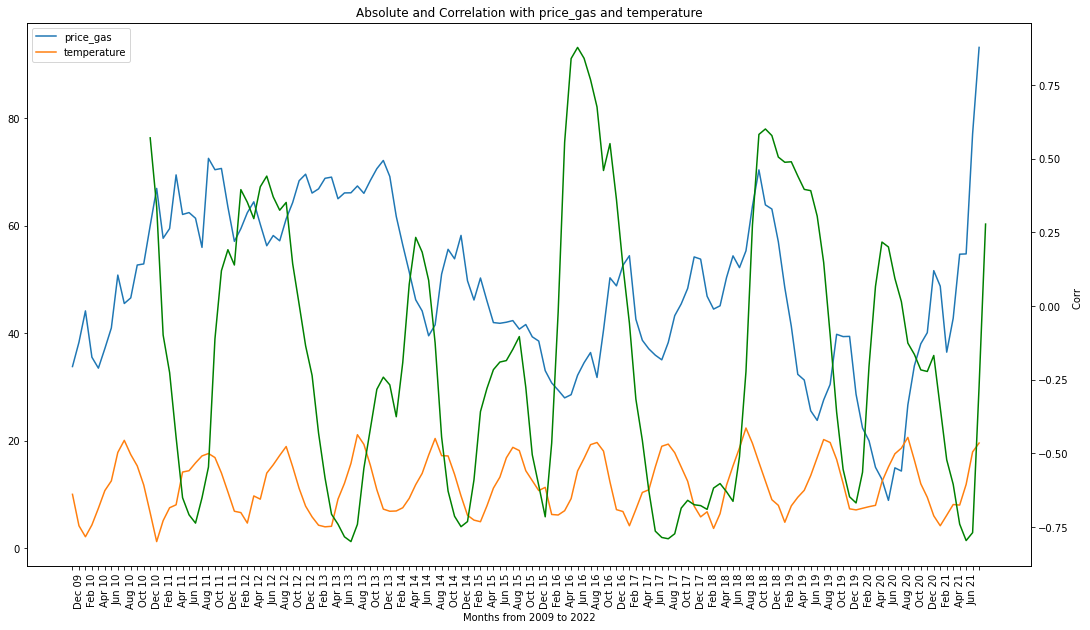

price_gas euas


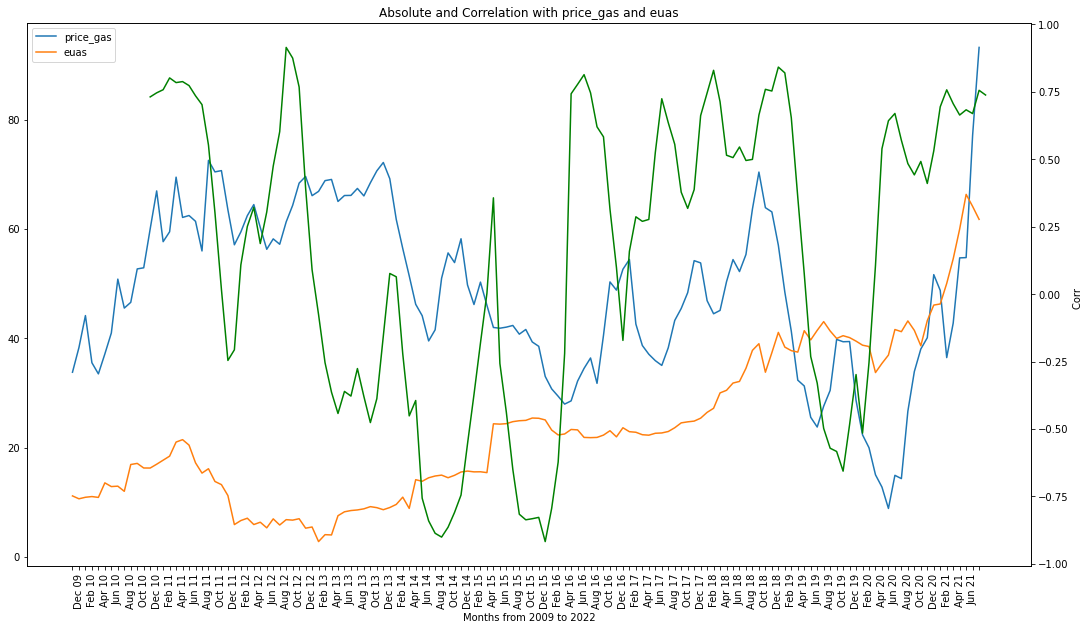

price_gas supply


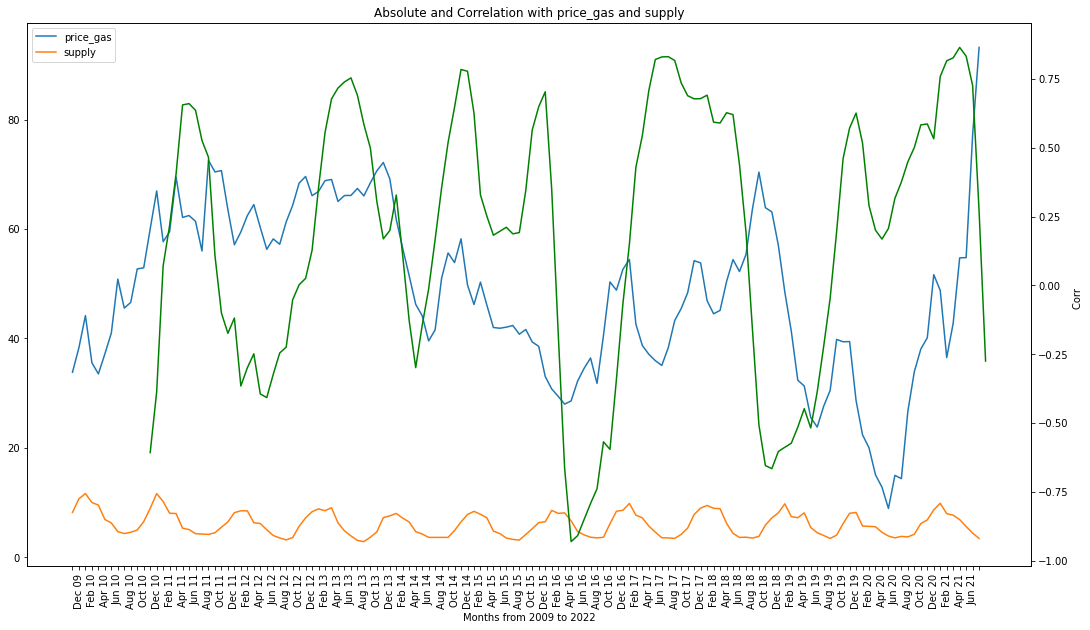

price_gas coal_gbp


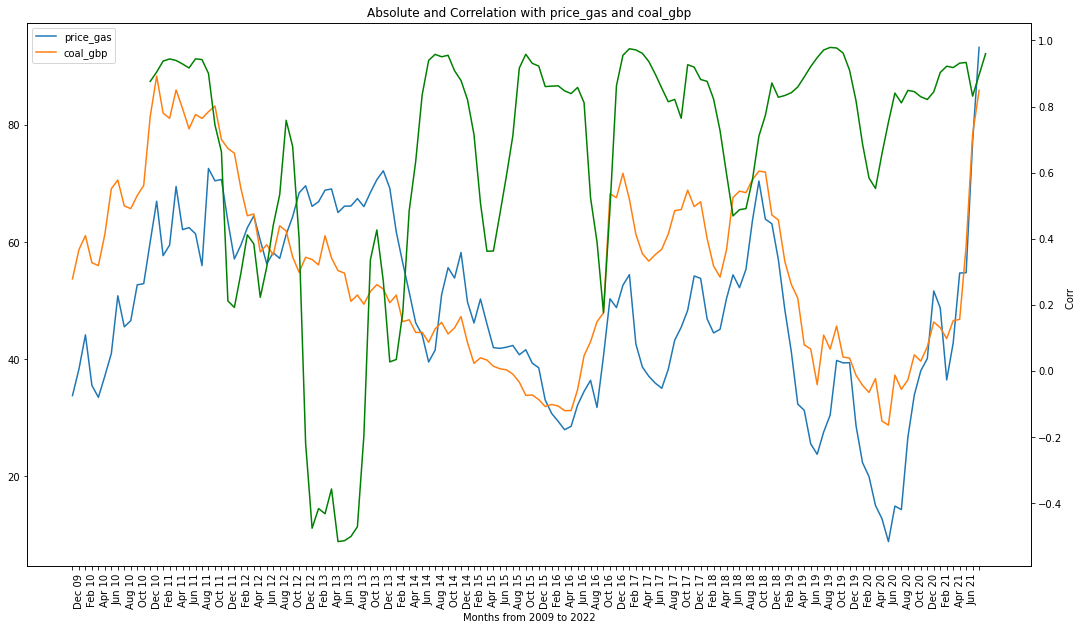

price_gas eurgbp


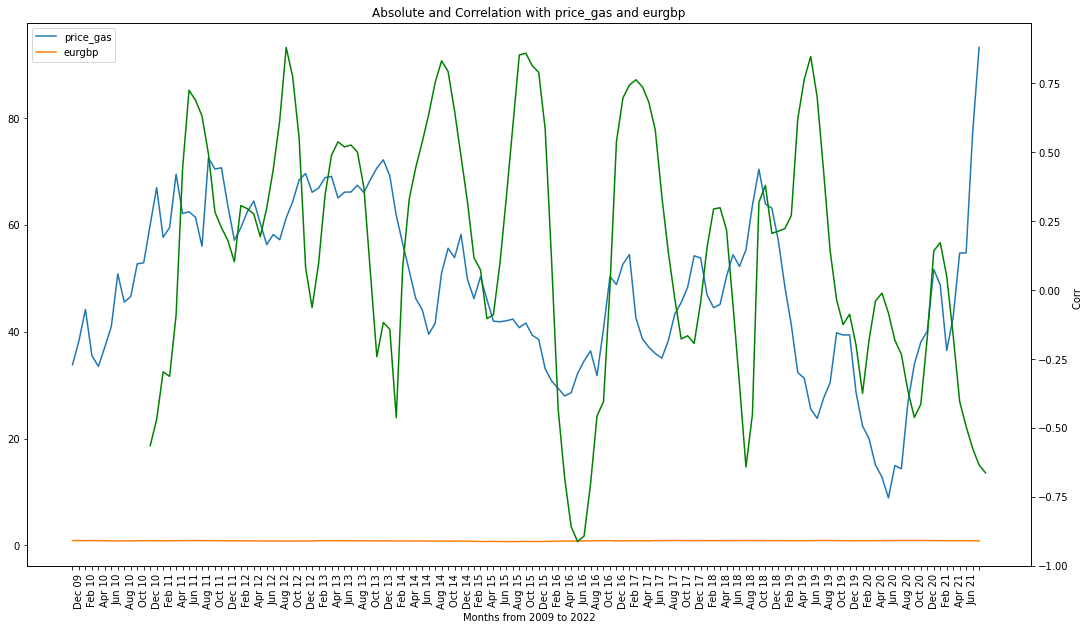

price_gas gbpusd


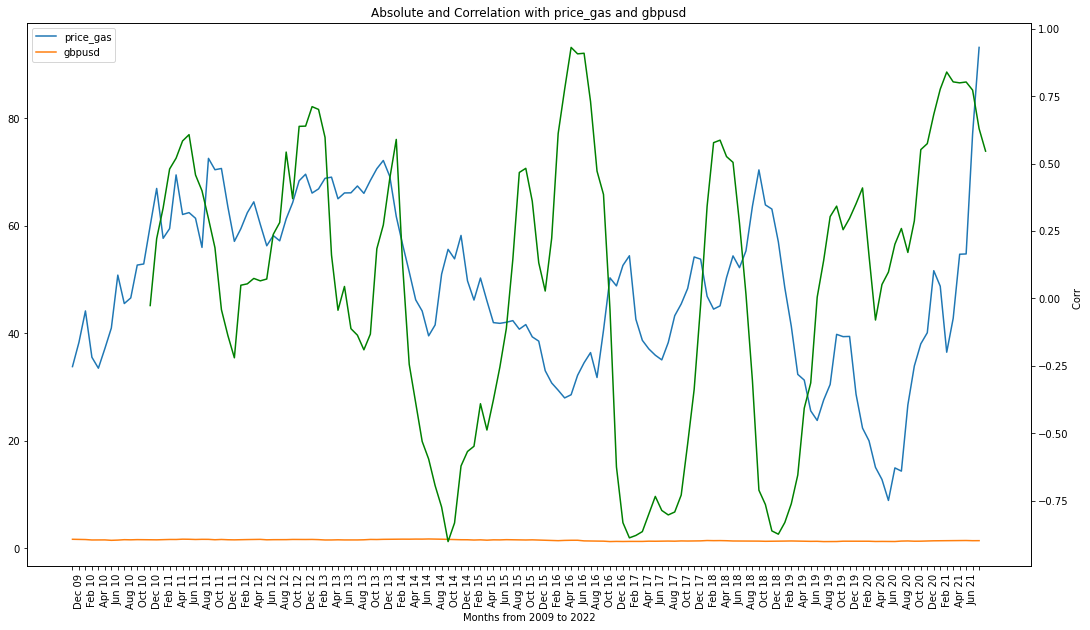

price_gas churn


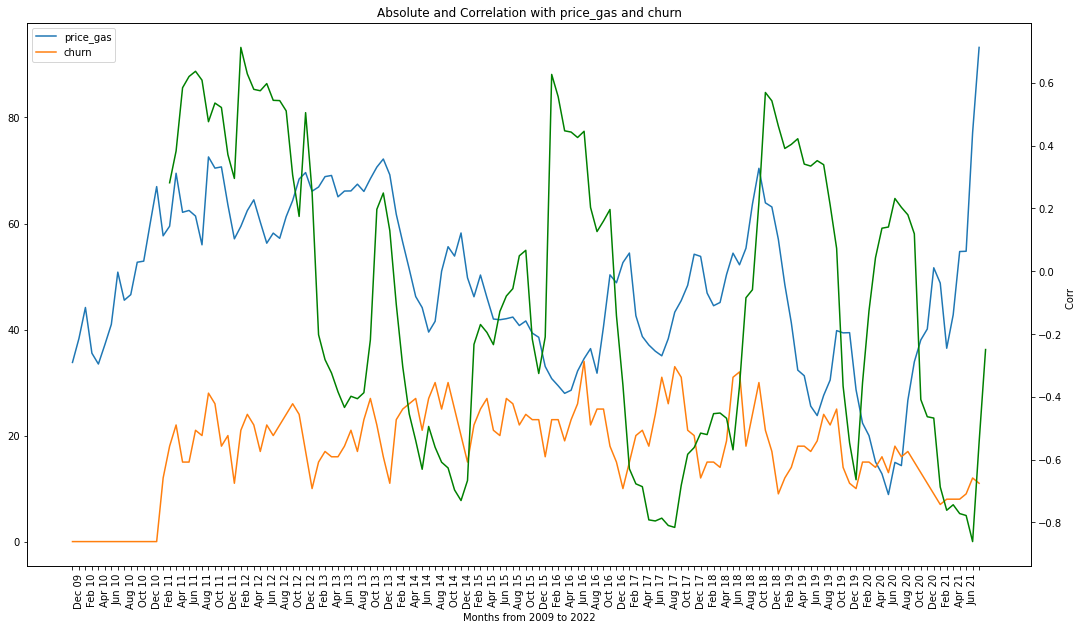

price_brent_gbp open_interest_gas


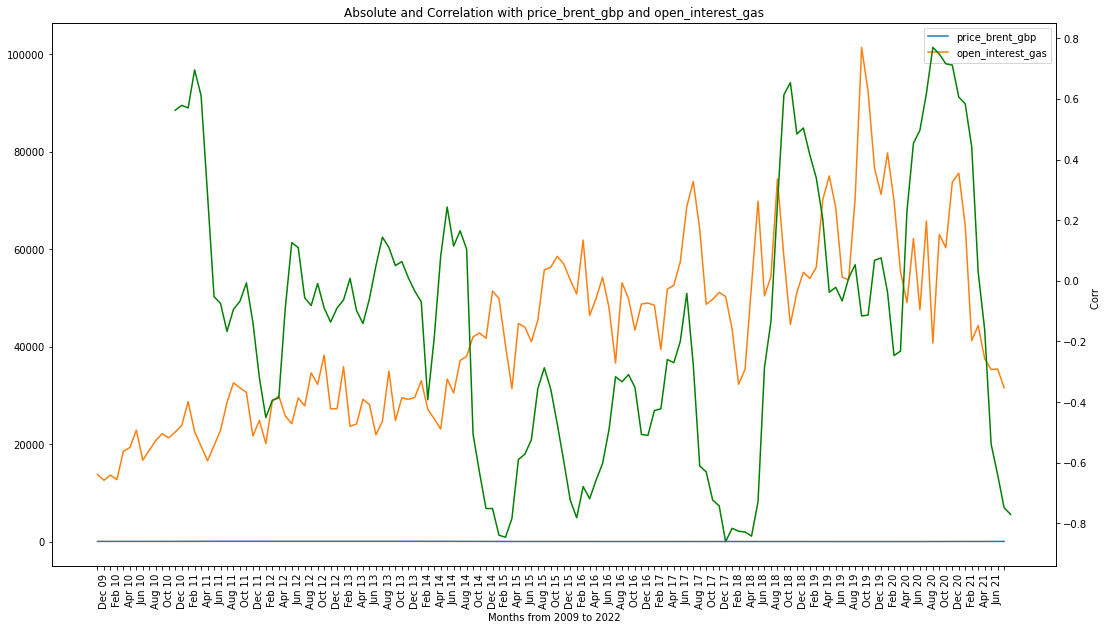

price_brent_gbp lng


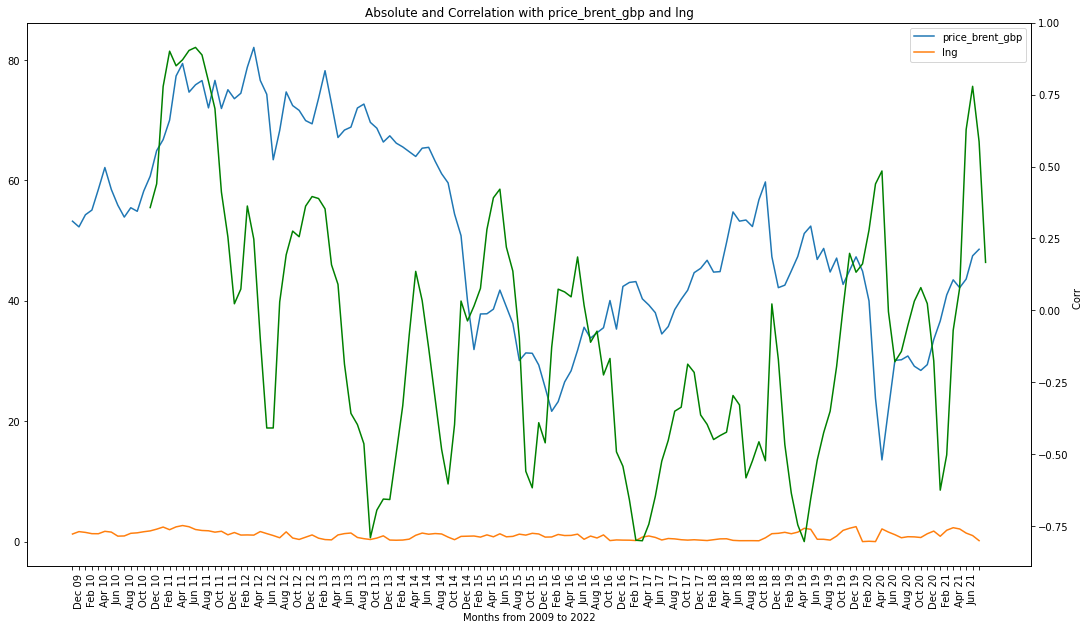

price_brent_gbp storage


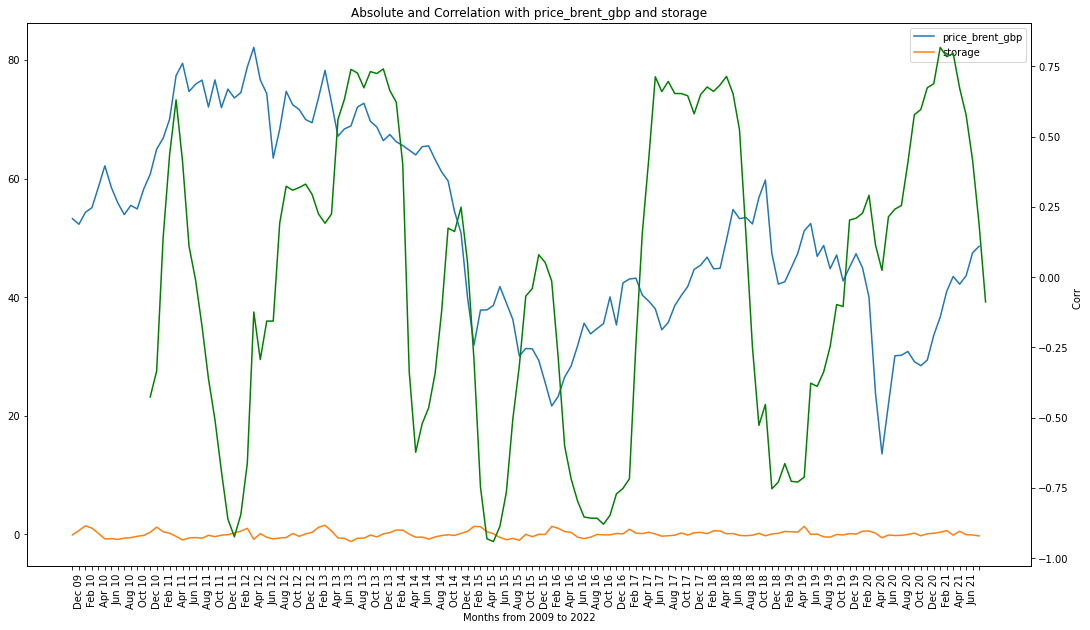

price_brent_gbp temperature


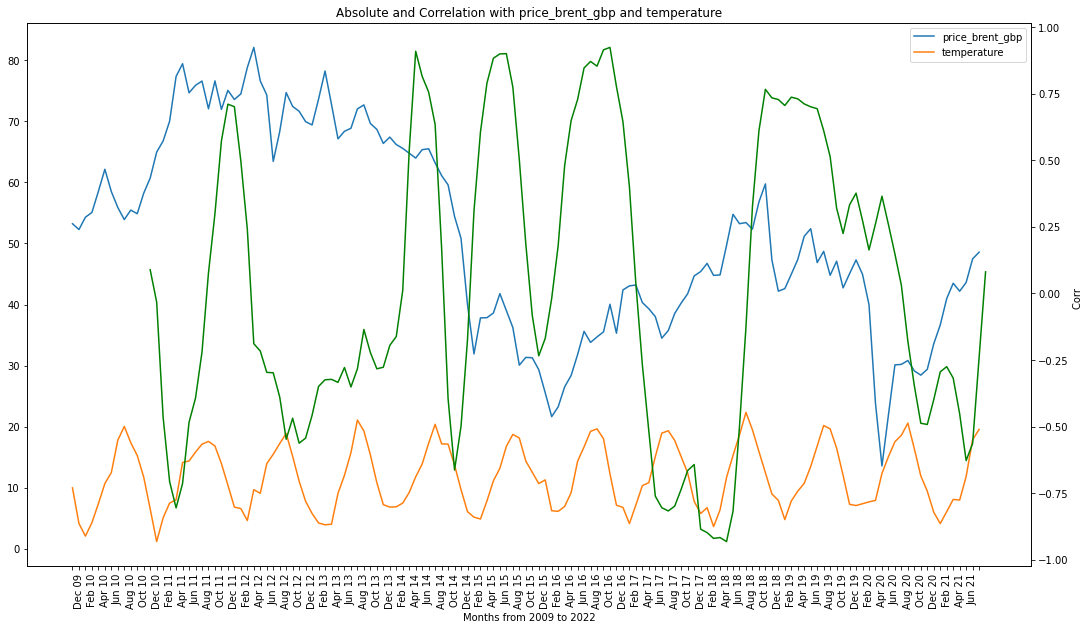

price_brent_gbp euas


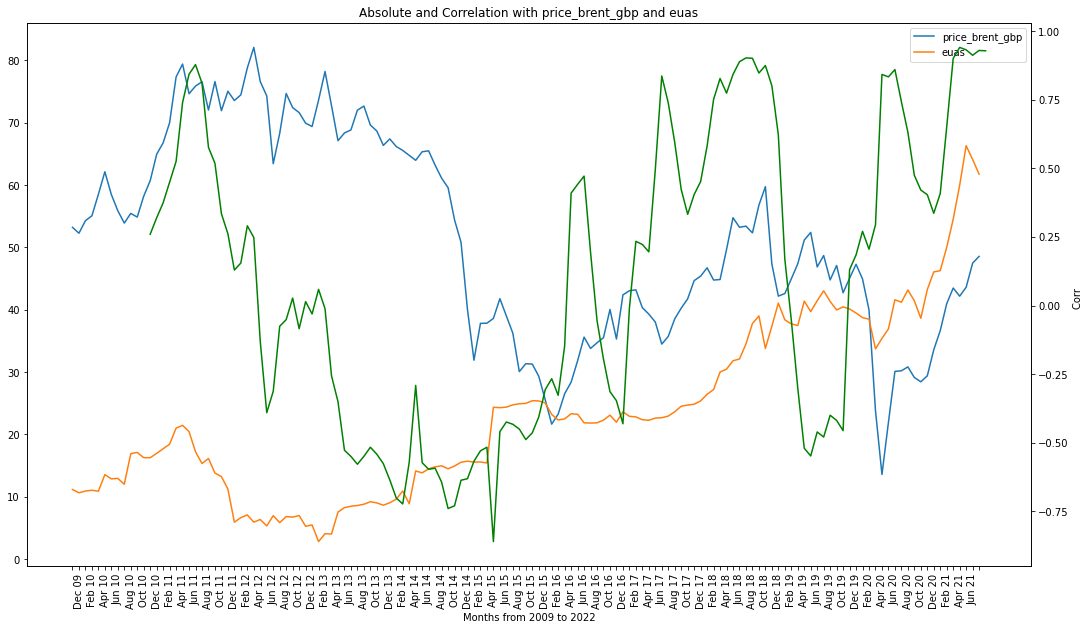

price_brent_gbp supply


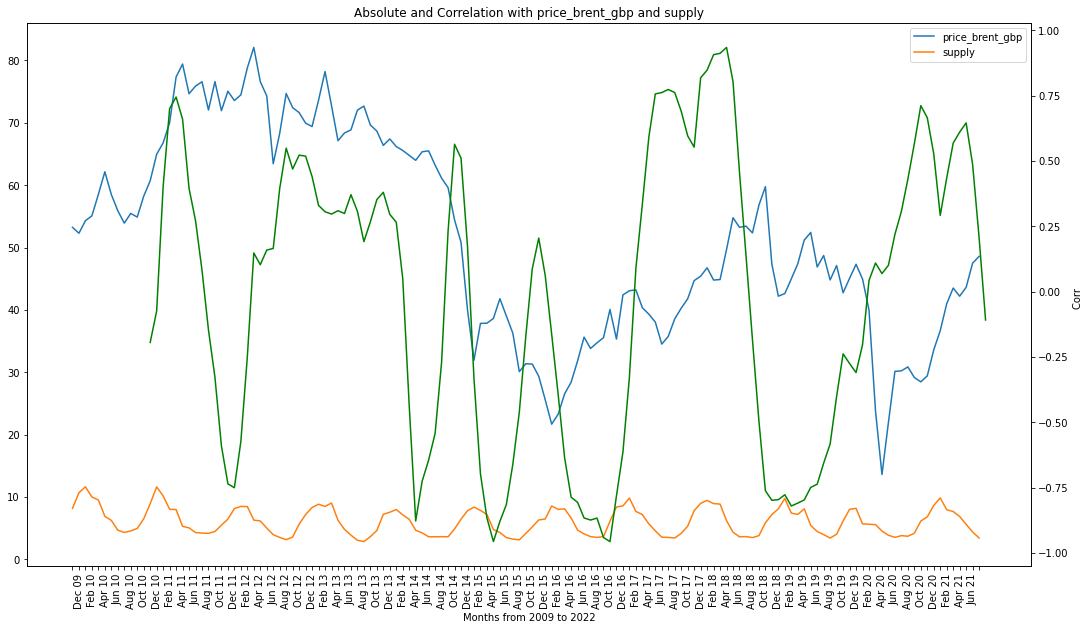

price_brent_gbp coal_gbp


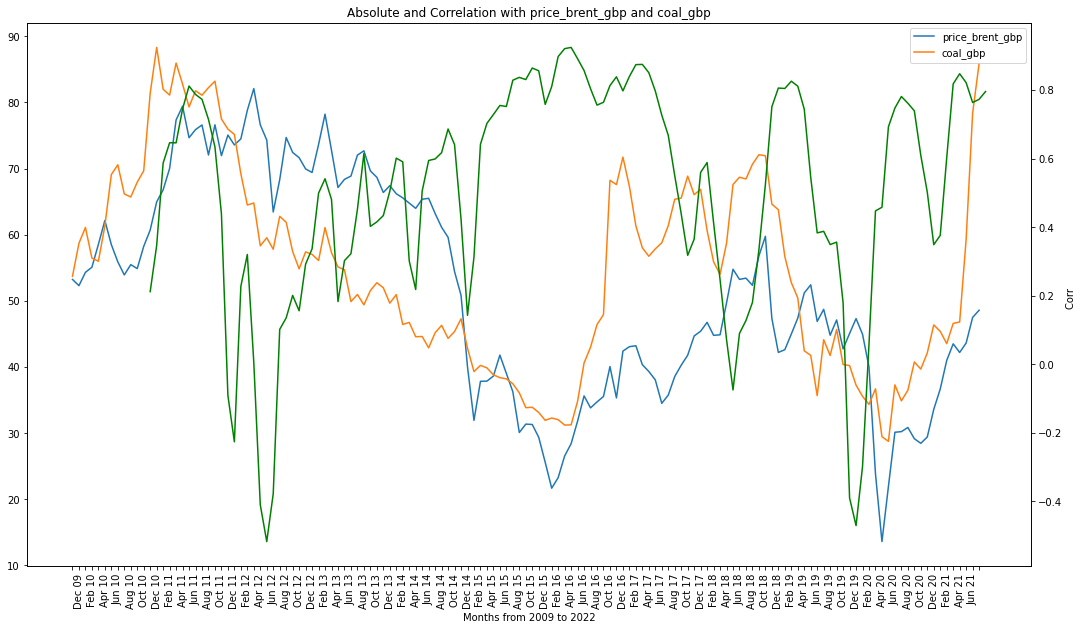

price_brent_gbp eurgbp


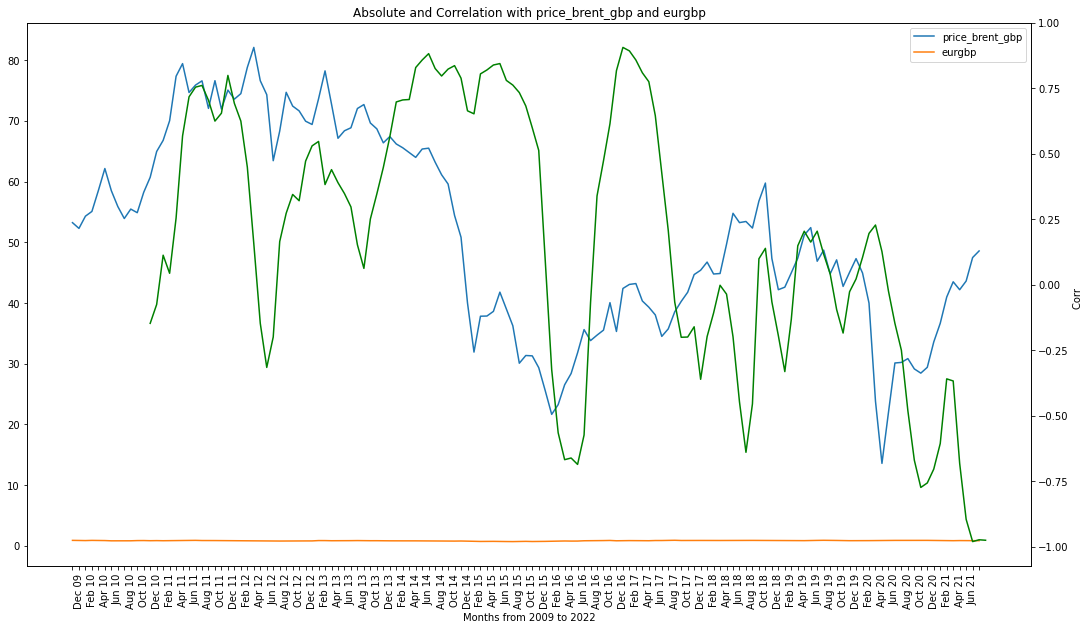

price_brent_gbp gbpusd


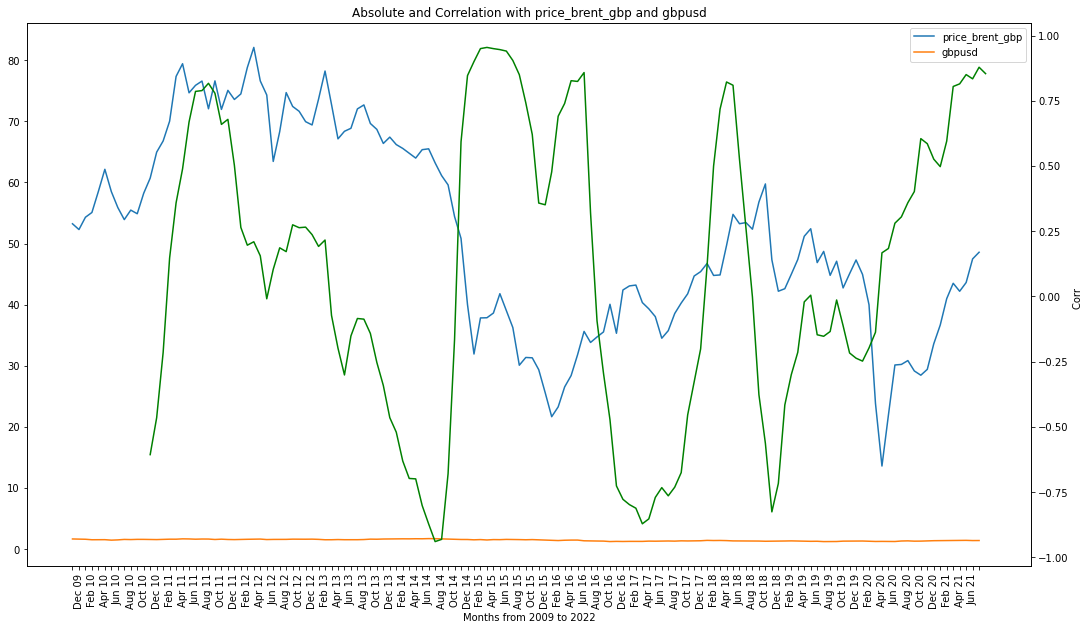

price_brent_gbp churn


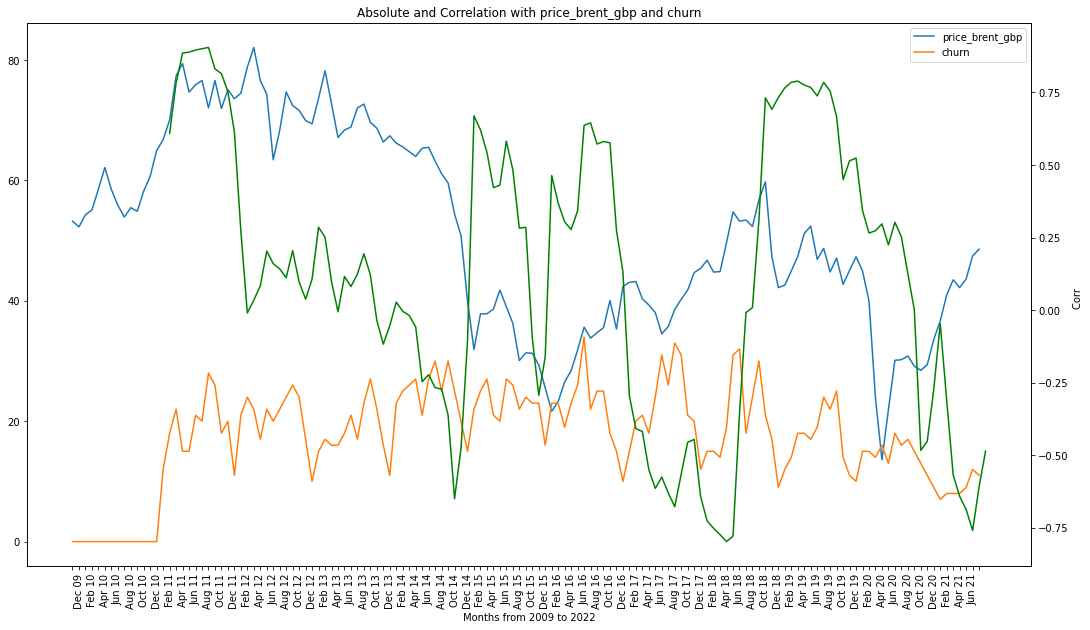

open_interest_gas lng


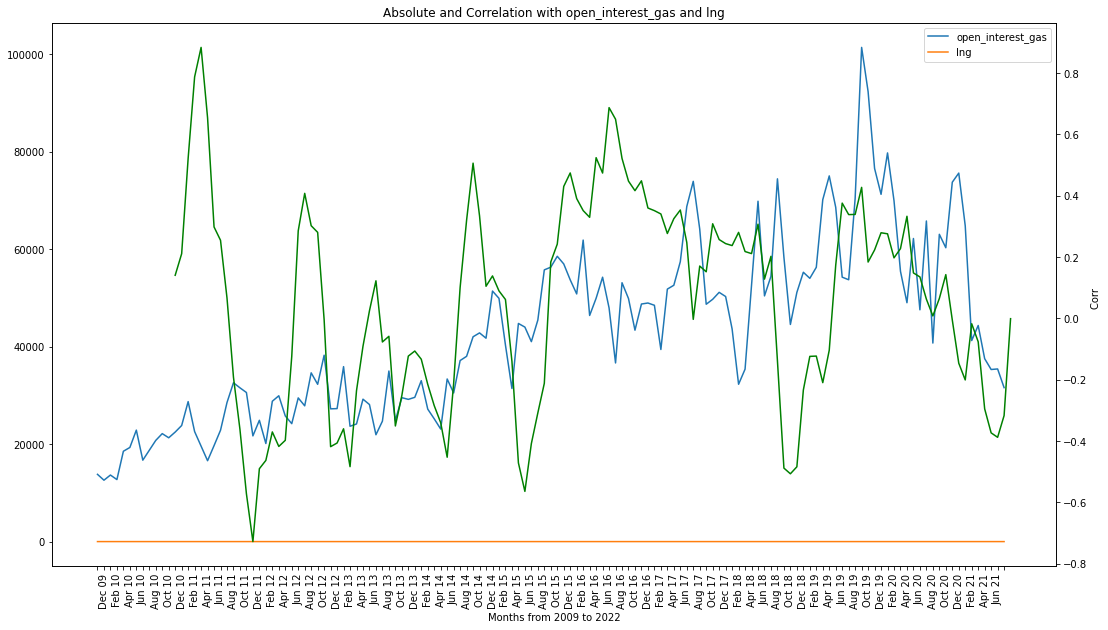

open_interest_gas storage


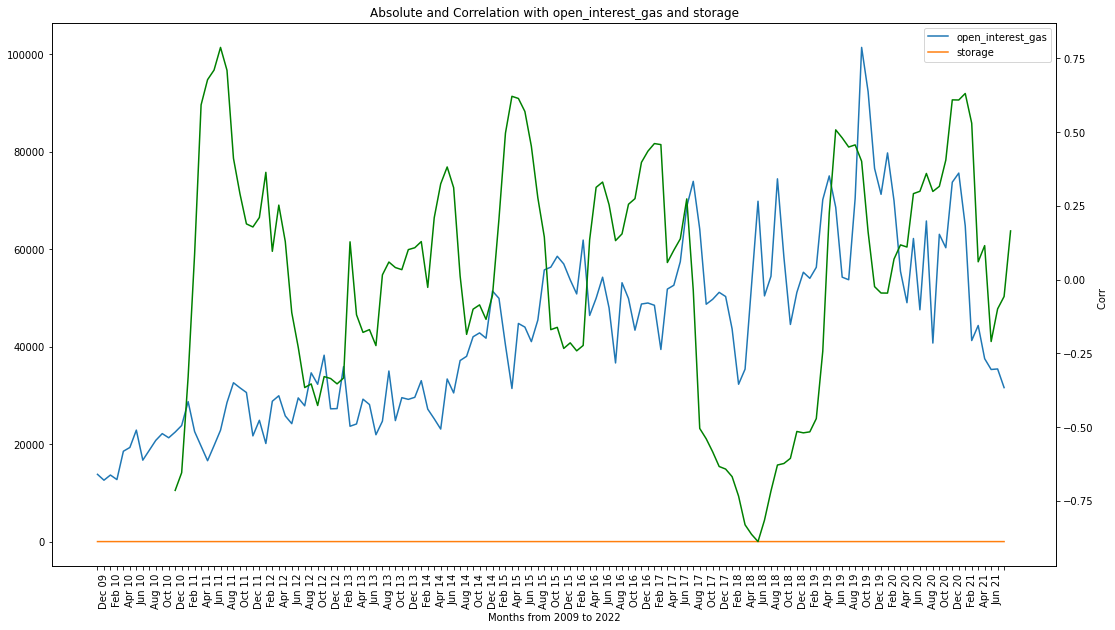

open_interest_gas temperature


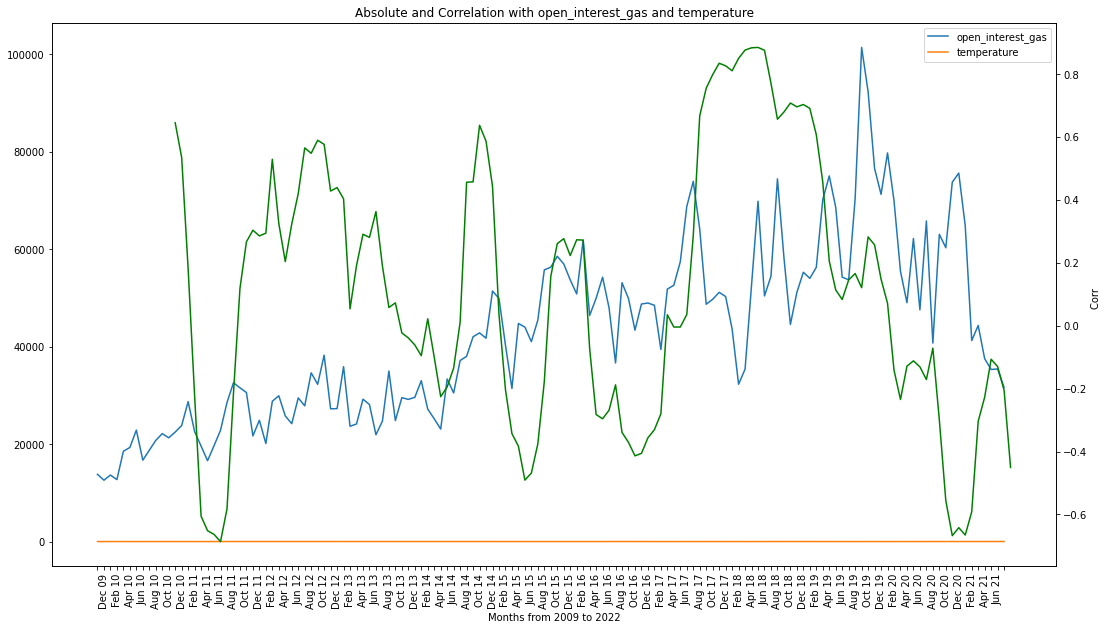

open_interest_gas euas


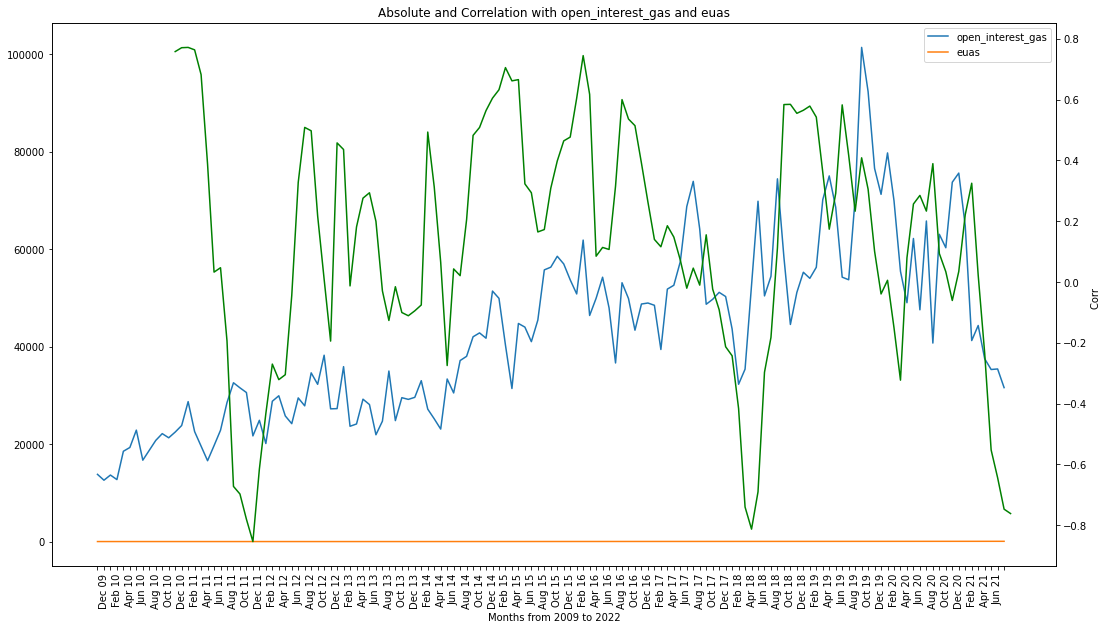

open_interest_gas supply


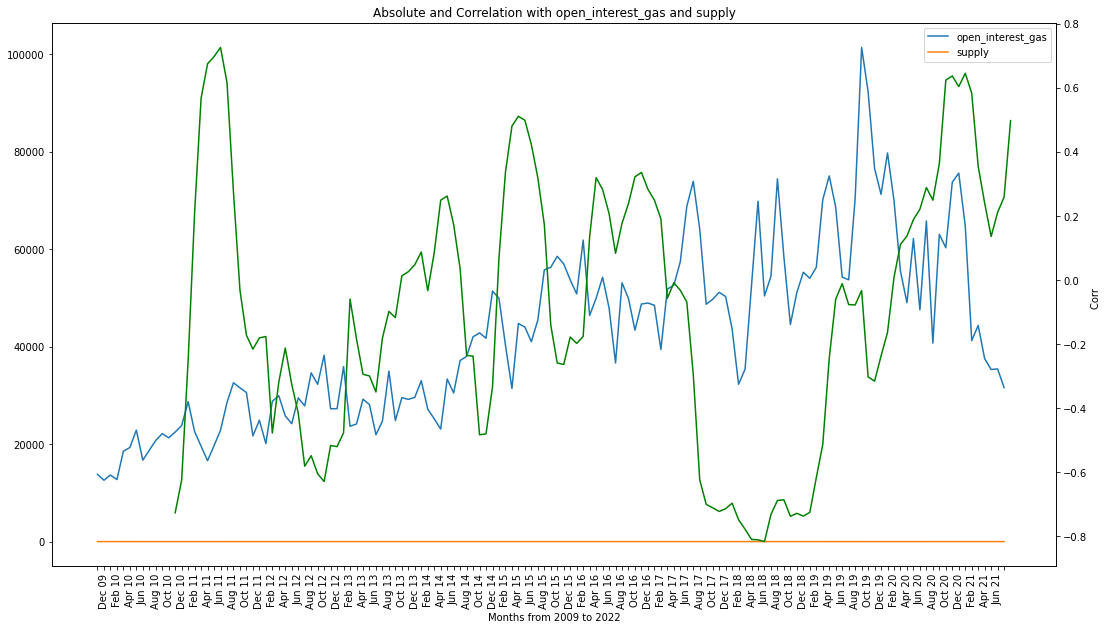

open_interest_gas coal_gbp


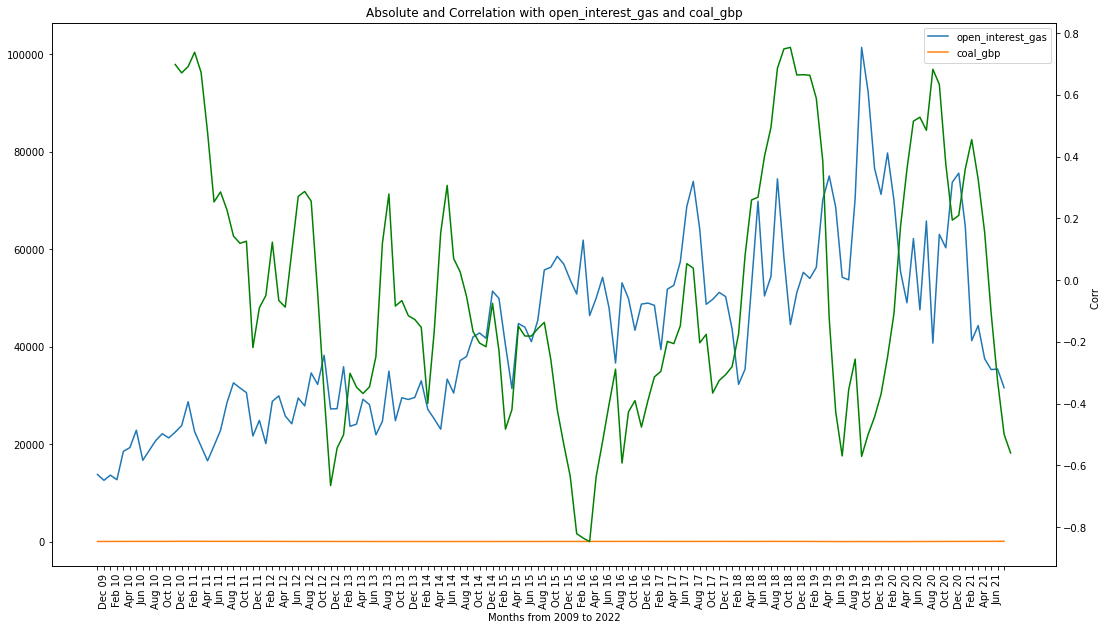

open_interest_gas eurgbp


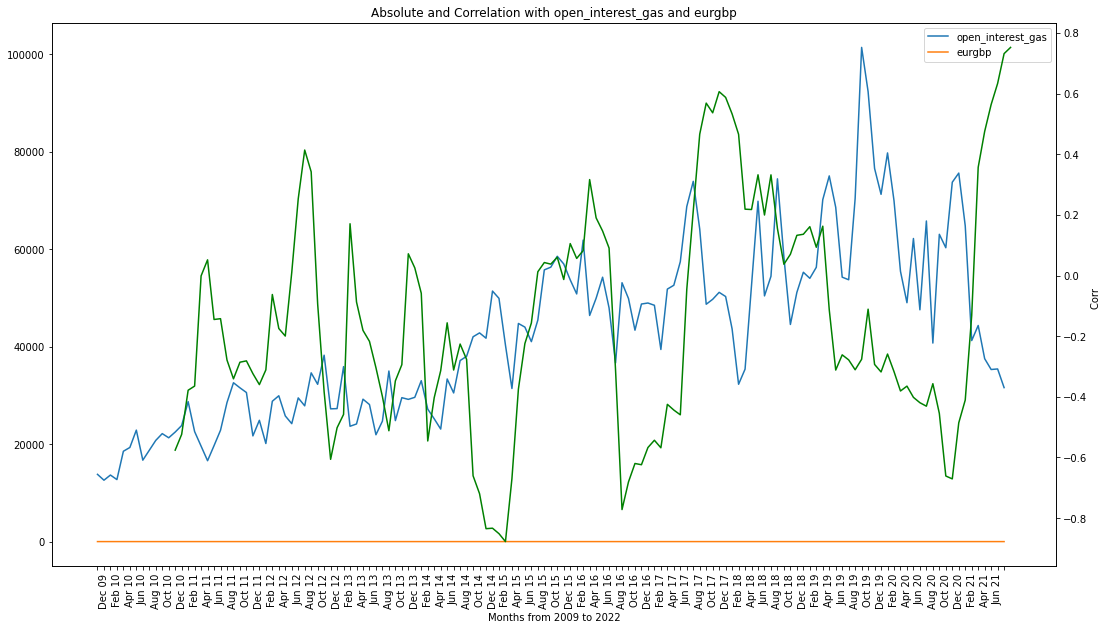

open_interest_gas gbpusd


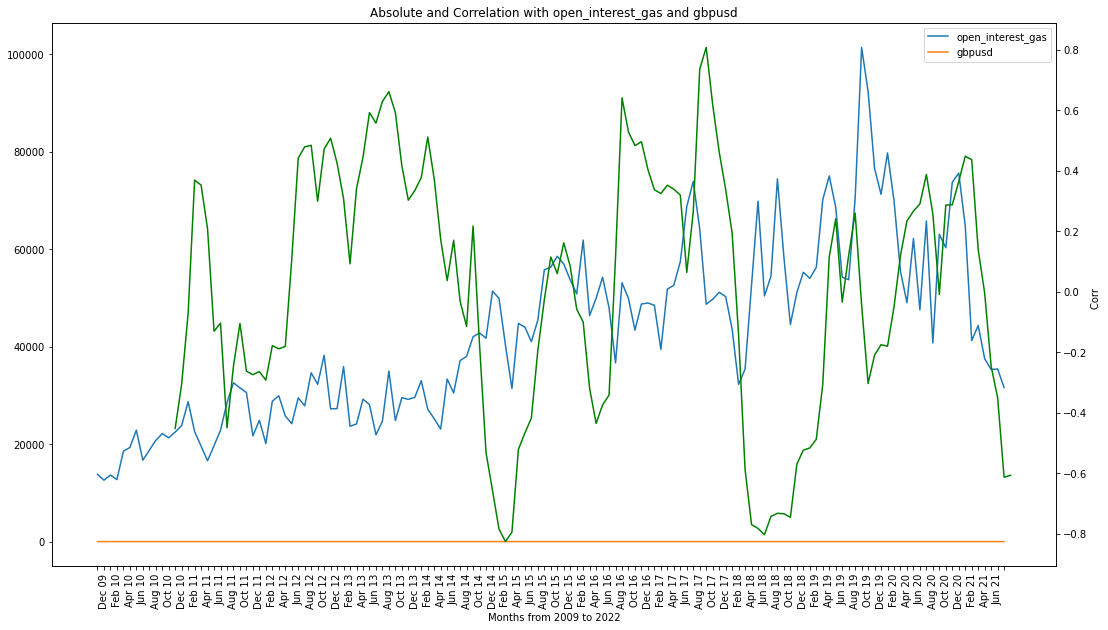

open_interest_gas churn


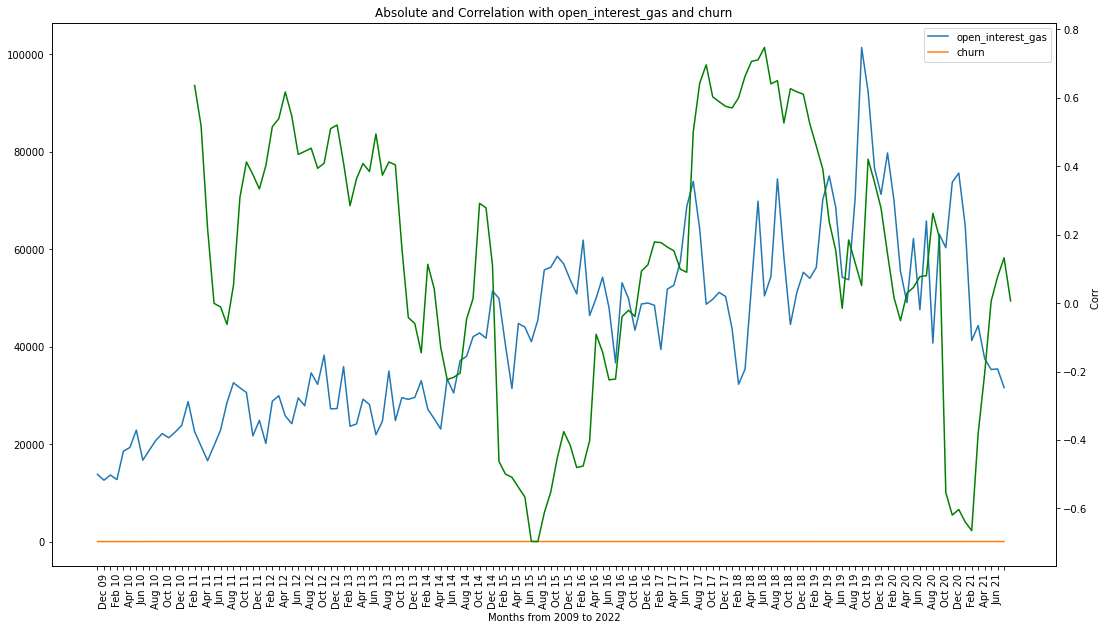

In [8]:
###### Rolling correlation ######

import itertools

comb_obj = itertools.combinations(column_names, 2)
comb_list = list(comb_obj)
# comb_list is all the 2 length combinations of the list of column names

length_rolling=12

for combination in comb_list:
    val1=combination[0]
    val2=combination[1]
    print(val1,val2)
    correlation = df[str(val1)].rolling(length_rolling).corr(df[str(val2)]) 
    # print(correlation)

    plt.figure(figsize=(18, 10))

    plt.plot(df.months,df[val1], label=str(val1))
    plt.plot(df.months,df[val2], label=str(val2))

    plt.xlabel("Months from 2009 to 2022")
    plt.title("Absolute and Correlation with " + val1 + " and " + val2)
    plt.legend()

    ax = plt.gca()
    plt.xticks(rotation=90)
    for label in ax.get_xaxis().get_ticklabels()[::2]:
        label.set_visible(False)


    plt2=plt.twinx()
    plt2.plot(correlation, color="green")
    plt2.set_ylabel("Corr  ", color="black")    
    plt.show() 

    